In [76]:
import json
import pandas as pd
import os
import glob
from PIL import Image

from util.visualize import *

In [126]:
import shutil
from tqdm import tqdm


for i in tqdm(range(10)):
    annotation = annotations[i]
    out_path = f"./images/{annotation.replace(path_annotations, '')}"
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    shutil.copy(annotation, out_path)
    image = annotation.replace(path_annotations, path_images).replace("json", "jpg")
    out_path = f"./images/{image.replace(path_images, '')}"
    shutil.copy(image, out_path)
    

100%|██████████| 10/10 [00:00<00:00, 387.24it/s]


In [77]:
root = "/Users/constantinseibold/workspace/MIMIC_anatomy"
path_images = "/Users/constantinseibold/workspace/MIMIC_anatomy/images_512/"
path_annotations = "/Users/constantinseibold/workspace/MIMIC_anatomy/annotations/"
category_path =  "/Users/constantinseibold/workspace/MIMIC_anatomy/categories.json"


In [78]:
annotations = glob.glob(path_annotations + "**/*.json", recursive=True)
categories = json.load(open(category_path))

In [128]:
index = 70

# current = "annotations/p10207476/s59384022/0020344f-46eb803e-d96b4540-dc468da5-7c907bfb.json"
path = annotations[index]
# path = os.path.join(root, current)
annotation = json.load(open(path))
file = path.replace(path_annotations, path_images).replace("json", "jpg")

/var/folders/dw/_7yqpqlx54d_ymd52tfx0ygc0000gn/T/ipykernel_7589/2378667285.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groups_by_sentences = sentences.groupby("sentences").apply(lambda x: x["id"])


the bones are probably demineralized [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 118, 119]
['vertebrae C4', 'vertebrae C5', 'vertebrae C6', 'vertebrae C7', 'vertebrae T1', 'vertebrae T2', 'vertebrae T3', 'vertebrae T4', 'vertebrae T5', 'vertebrae T6', 'vertebrae T7', 'vertebrae T8', 'vertebrae T9', 'vertebrae T10', 'vertebrae T11', 'vertebrae T12', 'vertebrae L1', 'vertebrae L2', 'vertebrae L3', 'vertebrae L4', 'vertebrae L5', 'rib_cartilage', 'sternum', 'clavicle left', 'clavicle right', 'lateral clavicles', 'scapula left', 'scapula right', 'lateral scapulas', 'right humerus', 'left humerus', 'posterior 12th rib right', 'posterior 12th rib left', 'posterior 11th rib right', 'posterior 11th rib left', 'posterior 10th rib right', 'posterior 10th rib left', 'anterior 9th 

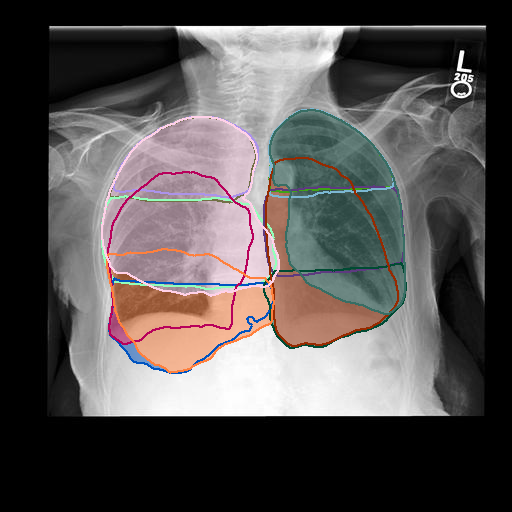

In [130]:
image = Image.open(file)

text_annotations = [ann for ann in annotation if ann["sentences"] !="None"]
text_annotations = pd.DataFrame(text_annotations)

sentences = text_annotations.explode("sentences")
groups_by_sentences = sentences.groupby("sentences").apply(lambda x: x["id"])

for i in range(len(sentences.sentences.unique())):
    
    cur_ann = text_annotations[
        text_annotations.id.isin(
        groups_by_sentences[sentences.sentences.unique()[i]].tolist()
        )
    ]

    print(sentences.sentences.unique()[i], groups_by_sentences[sentences.sentences.unique()[i]].tolist())
    
    print(
        [
            c["name"] for c in categories
            if c["id"] in groups_by_sentences[sentences.sentences.unique()[i]].tolist()
        ]
    )
    visualize_coco_annotations_pil(image, cur_ann.to_dict(orient="records"), 159, False, False).save(f"sample_images/{sentences.sentences.unique()[i]}.jpg")
    
visualize_coco_annotations_pil(image, cur_ann.to_dict(orient="records"), 159, False, False)

In [131]:
category_dict = [
    {'supercategory': 'cervical vertebrae',
    'id': 0,
    'name': 'vertebrae C3'},
    {'supercategory': 'cervical vertebrae', 'id': 1, 'name': 'vertebrae C4'},
    {'supercategory': 'cervical vertebrae', 'id': 2, 'name': 'vertebrae C5'},
    {'supercategory': 'cervical vertebrae', 'id': 3, 'name': 'vertebrae C6'},
    {'supercategory': 'cervical vertebrae', 'id': 4, 'name': 'vertebrae C7'},
    {'supercategory': 'thoracic vertebrae', 'id': 5, 'name': 'vertebrae T1'},
    {'supercategory': 'thoracic vertebrae', 'id': 6, 'name': 'vertebrae T2'},
    {'supercategory': 'thoracic vertebrae', 'id': 7, 'name': 'vertebrae T3'},
    {'supercategory': 'thoracic vertebrae', 'id': 8, 'name': 'vertebrae T4'},
    {'supercategory': 'thoracic vertebrae', 'id': 9, 'name': 'vertebrae T5'},
    {'supercategory': 'thoracic vertebrae', 'id': 10, 'name': 'vertebrae T6'},
    {'supercategory': 'thoracic vertebrae', 'id': 11, 'name': 'vertebrae T7'},
    {'supercategory': 'thoracic vertebrae', 'id': 12, 'name': 'vertebrae T8'},
    {'supercategory': 'thoracic vertebrae', 'id': 13, 'name': 'vertebrae T9'},
    {'supercategory': 'thoracic vertebrae', 'id': 14, 'name': 'vertebrae T10'},
    {'supercategory': 'thoracic vertebrae', 'id': 15, 'name': 'vertebrae T11'},
    {'supercategory': 'thoracic vertebrae', 'id': 16, 'name': 'vertebrae T12'},
    {'supercategory': 'lumbar vertebrae', 'id': 17, 'name': 'vertebrae L1'},
    {'supercategory': 'lumbar vertebrae', 'id': 18, 'name': 'vertebrae L2'},
    {'supercategory': 'lumbar vertebrae', 'id': 19, 'name': 'vertebrae L3'},
    {'supercategory': 'lumbar vertebrae', 'id': 20, 'name': 'vertebrae L4'},
    {'supercategory': 'lumbar vertebrae', 'id': 21, 'name': 'vertebrae L5'},
    {'supercategory': 'thoracic bones', 'id': 22, 'name': 'rib_cartilage'},
    {'supercategory': 'thoracic bones', 'id': 23, 'name': 'sternum'},
    {'supercategory': 'thoracic bones', 'id': 24, 'name': 'clavicle left'},
    {'supercategory': 'thoracic bones', 'id': 25, 'name': 'clavicle right'},
    {'supercategory': 'thoracic bones', 'id': 26, 'name': 'lateral clavicles'},
    {'supercategory': 'thoracic bones', 'id': 27, 'name': 'scapula left'},
    {'supercategory': 'thoracic bones', 'id': 28, 'name': 'scapula right'},
    {'supercategory': 'thoracic bones', 'id': 29, 'name': 'lateral scapulas'},
    {'supercategory': 'thoracic bones', 'id': 30, 'name': 'right humerus'},
    {'supercategory': 'thoracic bones', 'id': 31, 'name': 'left humerus'},
    {'supercategory': 'posterior rib right',
    'id': 32,
    'name': 'posterior 12th rib right'},
    {'supercategory': 'posterior rib left',
    'id': 33,
    'name': 'posterior 12th rib left'},
    {'supercategory': 'posterior rib right',
    'id': 34,
    'name': 'posterior 11th rib right'},
    {'supercategory': 'posterior rib left',
    'id': 35,
    'name': 'posterior 11th rib left'},
    {'supercategory': 'posterior rib right',
    'id': 36,
    'name': 'posterior 10th rib right'},
    {'supercategory': 'posterior rib left',
    'id': 37,
    'name': 'posterior 10th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 38,
    'name': 'anterior 9th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 39,
    'name': 'posterior 9th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 40,
    'name': 'anterior 9th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 41,
    'name': 'posterior 9th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 42,
    'name': 'anterior 8th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 43,
    'name': 'posterior 8th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 44,
    'name': 'anterior 8th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 45,
    'name': 'posterior 8th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 46,
    'name': 'anterior 7th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 47,
    'name': 'posterior 7th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 48,
    'name': 'anterior 7th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 49,
    'name': 'posterior 7th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 50,
    'name': 'anterior 6th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 51,
    'name': 'posterior 6th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 52,
    'name': 'anterior 6th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 53,
    'name': 'posterior 6th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 54,
    'name': 'anterior 5th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 55,
    'name': 'posterior 5th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 56,
    'name': 'anterior 5th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 57,
    'name': 'posterior 5th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 58,
    'name': 'anterior 4th rib right'},
    {'supercategory': 'posterior rib right',
    'id': 59,
    'name': 'posterior 4th rib right'},
    {'supercategory': 'anterior rib left',
    'id': 60,
    'name': 'anterior 4th rib left'},
    {'supercategory': 'posterior rib left',
    'id': 61,
    'name': 'posterior 4th rib left'},
    {'supercategory': 'anterior rib right',
    'id': 62,
    'name': 'anterior 3rd rib right'},
    {'supercategory': 'posterior rib right',
    'id': 63,
    'name': 'posterior 3rd rib right'},
    {'supercategory': 'anterior rib left',
    'id': 64,
    'name': 'anterior 3rd rib left'},
    {'supercategory': 'posterior rib left',
    'id': 65,
    'name': 'posterior 3rd rib left'},
    {'supercategory': 'anterior rib right',
    'id': 66,
    'name': 'anterior 2nd rib right'},
    {'supercategory': 'posterior rib right',
    'id': 67,
    'name': 'posterior 2nd rib right'},
    {'supercategory': 'anterior rib left',
    'id': 68,
    'name': 'anterior 2nd rib left'},
    {'supercategory': 'posterior rib left',
    'id': 69,
    'name': 'posterior 2nd rib left'},
    {'supercategory': 'anterior rib right',
    'id': 70,
    'name': 'anterior 1st rib right'},
    {'supercategory': 'posterior rib right',
    'id': 71,
    'name': 'posterior 1st rib right'},
    {'supercategory': 'anterior rib left',
    'id': 72,
    'name': 'anterior 1st rib left'},
    {'supercategory': 'posterior rib left',
    'id': 73,
    'name': 'posterior 1st rib left'},
    {'supercategory': 'posterior rib lateral',
    'id': 74,
    'name': 'lateral 12th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 75,
    'name': 'lateral posterior 11th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 76,
    'name': 'lateral posterior 10th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 77,
    'name': 'lateral posterior 9th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 78,
    'name': 'lateral anterior 9th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 79,
    'name': 'lateral posterior 8th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 80,
    'name': 'lateral anterior 8th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 81,
    'name': 'lateral posterior 7th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 82,
    'name': 'lateral anterior 7th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 83,
    'name': 'lateral posterior 6th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 84,
    'name': 'lateral anterior 6th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 85,
    'name': 'lateral posterior 5th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 86,
    'name': 'lateral anterior 5th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 87,
    'name': 'lateral posterior 4th rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 88,
    'name': 'lateral anterior 4th rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 89,
    'name': 'lateral posterior 3rd rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 90,
    'name': 'lateral anterior 3rd rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 91,
    'name': 'lateral posterior 2nd rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 92,
    'name': 'lateral anterior 2nd rib'},
    {'supercategory': 'posterior rib lateral',
    'id': 93,
    'name': 'lateral posterior 1st rib'},
    {'supercategory': 'anterior rib lateral',
    'id': 94,
    'name': 'lateral anterior 1st rib'},
    {'supercategory': 'diaphragm', 'id': 95, 'name': 'left hemidiaphragm'},
    {'supercategory': 'diaphragm', 'id': 96, 'name': 'right hemidiaphragm'},
    {'supercategory': 'diaphragm', 'id': 97, 'name': 'lateral diaphragm'},
    {'supercategory': 'digestive system', 'id': 98, 'name': 'stomach'},
    {'supercategory': 'digestive system', 'id': 99, 'name': 'small bowel'},
    {'supercategory': 'digestive system', 'id': 100, 'name': 'duodenum'},
    {'supercategory': 'digestive system', 'id': 101, 'name': 'liver'},
    {'supercategory': 'digestive system', 'id': 102, 'name': 'pancreas'},
    {'supercategory': 'digestive system', 'id': 103, 'name': 'kidney left'},
    {'supercategory': 'digestive system', 'id': 104, 'name': 'kidney right'},
    {'supercategory': 'digestive system', 'id': 105, 'name': 'esophagus'},
    {'supercategory': 'mediastinum', 'id': 106, 'name': 'cardiomediastinum'},
    {'supercategory': 'mediastinum', 'id': 107, 'name': 'upper mediastinum'},
    {'supercategory': 'mediastinum', 'id': 108, 'name': 'lower mediastinum'},
    {'supercategory': 'mediastinum',
    'id': 109,
    'name': 'lateral anterior mediastinum'},
    {'supercategory': 'mediastinum',
    'id': 110,
    'name': 'lateral middle mediastinum'},
    {'supercategory': 'mediastinum',
    'id': 111,
    'name': 'lateral posterior mediastinum'},
    {'supercategory': 'cardiovascular system', 'id': 112, 'name': 'heart'},
    {'supercategory': 'cardiovascular system',
    'id': 113,
    'name': 'heart atrium left'},
    {'supercategory': 'cardiovascular system',
    'id': 114,
    'name': 'heart atrium right'},
    {'supercategory': 'cardiovascular system',
    'id': 115,
    'name': 'heart myocardium'},
    {'supercategory': 'cardiovascular system',
    'id': 116,
    'name': 'heart ventricle left'},
    {'supercategory': 'cardiovascular system',
    'id': 117,
    'name': 'heart ventricle right'},
    {'supercategory': 'cardiovascular system',
    'id': 118,
    'name': 'ascending aorta'},
    {'supercategory': 'cardiovascular system',
    'id': 119,
    'name': 'descending aorta'},
    {'supercategory': 'cardiovascular system', 'id': 120, 'name': 'aortic arch'},
    {'supercategory': 'cardiovascular system',
    'id': 121,
    'name': 'pulmonary trunc'},
    {'supercategory': 'cardiovascular system',
    'id': 122,
    'name': 'left pulmonary artery '},
    {'supercategory': 'cardiovascular system',
    'id': 123,
    'name': 'right pulmonary artery '},
    {'supercategory': 'cardiovascular system',
    'id': 124,
    'name': 'inferior vena cava'},
    {'supercategory': 'right lung', 'id': 125, 'name': 'right upper zone lung'},
    {'supercategory': 'right lung', 'id': 126, 'name': 'right mid zone lung'},
    {'supercategory': 'right lung', 'id': 127, 'name': 'right lung base'},
    {'supercategory': 'right lung', 'id': 128, 'name': 'right apical zone lung'},
    {'supercategory': 'left lung', 'id': 129, 'name': 'left upper zone lung'},
    {'supercategory': 'left lung', 'id': 130, 'name': 'left mid zone lung'},
    {'supercategory': 'left lung', 'id': 131, 'name': 'left lung base'},
    {'supercategory': 'left lung', 'id': 132, 'name': 'left apical zone lung'},
    {'supercategory': 'left lung', 'id': 133, 'name': 'lung lower lobe left'},
    {'supercategory': 'left lung', 'id': 134, 'name': 'lung upper lobe left'},
    {'supercategory': 'right lung', 'id': 135, 'name': 'lung lower lobe right'},
    {'supercategory': 'right lung', 'id': 136, 'name': 'lung middle lobe right'},
    {'supercategory': 'right lung', 'id': 137, 'name': 'lung upper lobe right'},
    {'supercategory': 'right lung parenchyma',
    'id': 138,
    'name': 'Non-obstructed right upper lung parenchyma'},
    {'supercategory': 'right lung parenchyma',
    'id': 139,
    'name': 'Non-obstructed right mid lung parenchyma'},
    {'supercategory': 'right lung parenchyma',
    'id': 140,
    'name': 'Non-obstructed right base lung parenchyma'},
    {'supercategory': 'right lung parenchyma',
    'id': 141,
    'name': 'Non-obstructed right apical lung parenchyma'},
    {'supercategory': 'left lung parenchyma',
    'id': 142,
    'name': 'Non-obstructed left upper lung parenchyma'},
    {'supercategory': 'left lung parenchyma',
    'id': 143,
    'name': 'Non-obstructed left mid lung parenchyma'},
    {'supercategory': 'left lung parenchyma',
    'id': 144,
    'name': 'Non-obstructed left base lung parenchyma'},
    {'supercategory': 'left lung parenchyma',
    'id': 145,
    'name': 'Non-obstructed left apical lung parenchyma'},
    {'supercategory': 'trachea', 'id': 146, 'name': 'trachea'},
    {'supercategory': 'trachea', 'id': 147, 'name': 'tracheal bifurcation'},
    {'supercategory': 'extremities', 'id': 148, 'name': 'head'},
    {'supercategory': 'region', 'id': 149, 'name': 'Head-Neck-Region'},
    {'supercategory': 'breast', 'id': 150, 'name': 'breasts'},
    {'supercategory': 'breast', 'id': 151, 'name': 'Right breast'},
    {'supercategory': 'breast', 'id': 152, 'name': 'Left breast'},
    {'supercategory': 'region', 'id': 153, 'name': 'Background'},
    {'supercategory': 'region', 'id': 154, 'name': 'Upper Right Quadrant'},
    {'supercategory': 'region', 'id': 155, 'name': 'Lower Right Quadrant'},
    {'supercategory': 'region', 'id': 156, 'name': 'Upper Left Quadrant'},
    {'supercategory': 'region', 'id': 157, 'name': 'Lower Left Quadrant'}
    ]

with open("categories.json","w") as f:
    json.dump(categories, f)